In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
tfk = tf.keras
tfkl = tf.keras.layers
tf.config.set_visible_devices([], 'GPU') #disables GPU
print(tf.__version__)

2.12.0


### Set seed for reproducibility

In [2]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load data 

In [3]:
data = pd.read_csv('filled.csv')
data = data.drop(["date"], axis=1)
data.describe()

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4584.000000,4584.00000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,1.309454,13.65188,15.132366,9.302461,7.259924,30.032402,48.139158,1.368459,0.312924,7.796788,41.608059,17.833411,70.848520
std,1.077179,7.90552,13.681307,5.844837,5.259162,20.904562,25.055354,0.767196,0.203269,17.780870,43.576061,5.875968,14.551874
min,0.110000,1.37600,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,19.383000
25%,0.682000,8.00300,8.991750,5.317000,3.383000,15.000000,32.000000,1.000000,0.200000,1.000000,18.000000,13.050000,61.567000
50%,1.037000,12.28950,13.625000,8.433000,6.383000,25.000000,48.139158,1.000000,0.200000,3.000000,30.000000,17.833411,70.848520
75%,1.437250,16.95800,17.817000,11.533000,9.167000,38.000000,63.000000,1.368459,0.312924,7.796788,45.000000,22.333000,82.158250
max,12.767000,73.49000,398.717000,76.833000,34.383000,132.000000,142.000000,13.000000,1.900000,255.000000,521.000000,34.983000,100.000000


In [4]:
threshold = 3 #theshold a little high to retain some outliers
z_scores = np.abs((data - data.mean()) / data.std())
print(z_scores)
outliers = (z_scores > threshold).any(axis=1)
for column in data.columns:
    column_median = data[column].median()
    data.loc[outliers, column] = column_median

            BC     N_CPC     PM-10    PM-2.5    PM-1.0       NO2        O3  \
0     1.982537  0.521296  0.153448  0.421661  0.720662  0.575587  0.284935   
1     3.576515  1.387400  0.140165  1.065990  1.430471  1.529216  1.881401   
2     1.523931  0.512062  0.271565  0.182133  0.492488  1.816235  1.881401   
3     0.564016  0.182136  0.539595  0.376822  0.109699  2.151090  1.881401   
4     1.069967  0.312931  0.498152  0.282722  0.017669  1.577053  1.881401   
...        ...       ...       ...       ...       ...       ...       ...   
4579  0.539793  0.553649  0.572487  0.690432  0.759232  0.001550  0.353651   
4580  0.485020  0.535307  0.557868  0.656214  0.730710  0.333305  0.085377   
4581  0.235294  0.550992  0.577384  0.687694  0.771972  0.671260  0.752767   
4582  0.469238  0.524682  0.545662  0.659122  0.784711  0.719097  0.792679   
4583  0.692971  0.561491  0.539595  0.647659  0.778246  0.862606  0.912413   

           SO2        CO        NO       NOX      TEMP       HU

In [5]:
target = pd.DataFrame(data.BC)
data = data.drop(['BC'], axis=1)
print('Boston dataset shape',data.shape)
print('Target shape', target.shape)
data.describe()

Boston dataset shape (4584, 12)
Target shape (4584, 1)


,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,12.576968,13.429568,8.558888,6.641578,26.617480,50.051105,1.238878,0.272130,4.597617,33.367876,17.818627,71.276012
std,6.198740,6.447633,4.380079,4.076459,15.669199,21.947755,0.476886,0.135223,5.951530,22.669134,5.424332,13.325645
min,1.376000,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,27.250000
25%,8.115500,9.267000,5.512750,3.550000,15.000000,39.000000,1.000000,0.200000,1.000000,18.000000,13.617000,64.408500
50%,12.289500,13.625000,8.433000,6.383000,25.000000,48.139158,1.000000,0.200000,3.000000,30.000000,17.833411,70.848520
75%,14.680500,15.667000,10.004250,8.000000,31.000000,62.000000,1.368459,0.300000,6.000000,41.608059,21.800000,80.867000
max,37.228000,56.100000,26.650000,22.533000,91.000000,123.000000,3.000000,0.900000,60.000000,167.000000,34.983000,100.000000


Split in train and test

In [6]:
#split in test and train

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=seed, shuffle=True)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

test_size = 24*19

X_train = data.iloc[:-test_size]
y_train = target.iloc[:-test_size]
X_test = data.iloc[-test_size:]
y_test = target.iloc[-test_size:]


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3667, 12) (3667, 1)
(917, 12) (917, 1)


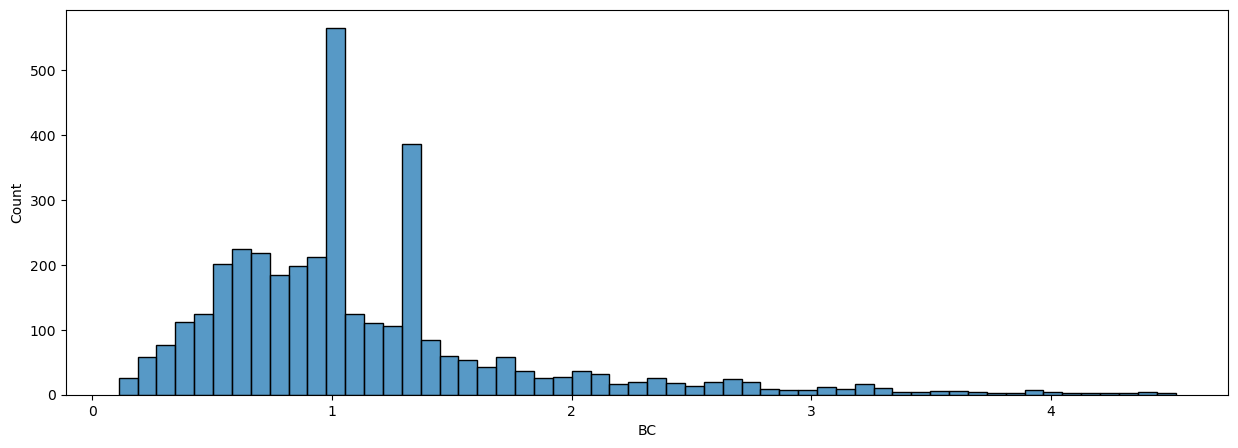

In [7]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='BC')
plt.show()

### Process data

In [8]:
# Normalize both features and target
max_df = X_train.max()
min_df = X_train.min()
max_t = y_train.max()
min_t = y_train.min()

# X_train = (X_train - min_df)/(max_df - min_df)
# y_train = (y_train - min_t)/(max_t - min_t)

print('Dataset shape', X_train.shape)
print('Target shape', y_train.shape)
X_train.describe()

Dataset shape (3667, 12)
Target shape (3667, 1)


,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,12.595808,13.417527,8.576066,6.658359,26.709701,49.947608,1.237087,0.270637,4.634091,33.493482,17.811958,71.425995
std,6.242902,6.423970,4.396226,4.098596,15.883207,22.253668,0.475735,0.134560,6.084721,23.052225,5.397776,13.241813
min,1.376000,0.600000,0.500000,0.333000,2.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.300000,27.283000
25%,8.086500,9.267000,5.467000,3.550000,15.000000,38.000000,1.000000,0.200000,1.000000,18.000000,13.600000,64.608000
50%,12.289500,13.625000,8.433000,6.383000,25.000000,48.139158,1.000000,0.200000,3.000000,30.000000,17.833411,70.848520
75%,14.789500,15.667000,10.050000,8.050000,31.000000,62.000000,1.368459,0.300000,6.000000,41.608059,21.733000,81.016500
max,37.228000,55.100000,26.650000,22.533000,90.000000,123.000000,3.000000,0.900000,60.000000,161.000000,34.483000,100.000000


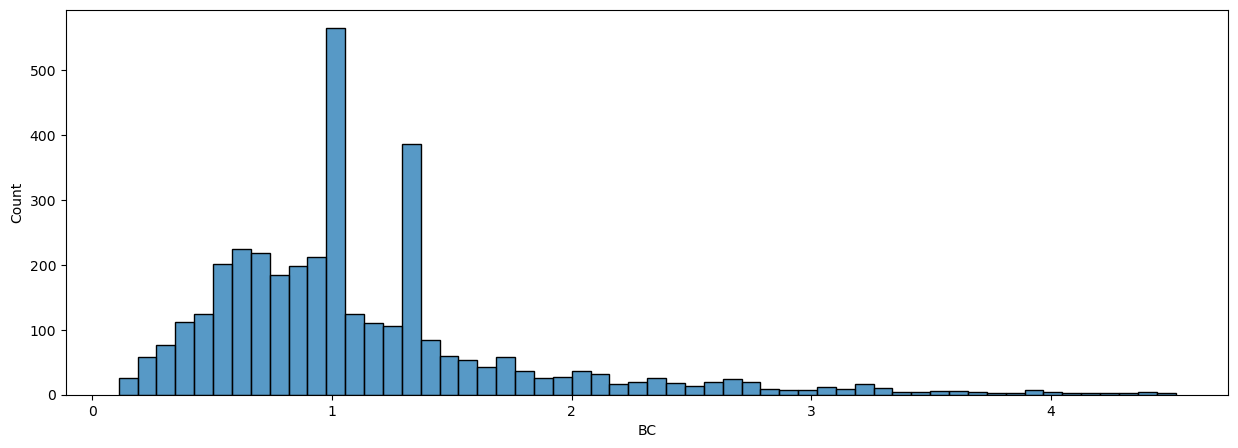

In [9]:
# Inspect the target after normalization
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='BC')
plt.show()

In [10]:
# Normalize the test set with the same parameters of training set
# X_test = (X_test - min_df)/(max_df - min_df)
# y_test = (y_test - min_t)/(max_t - min_t)

In [11]:
print('Dataset shape', X_test.shape)
print('Target shape', y_test.shape)
X_test.describe()

Dataset shape (917, 12)
Target shape (917, 1)


,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,12.501626,13.477718,8.490194,6.574474,26.248697,50.464979,1.246039,0.278101,4.451759,32.865588,17.845300,70.676245
std,6.021646,6.544728,4.316592,3.988198,14.785029,20.685716,0.481655,0.137754,5.386723,21.072136,5.532161,13.646618
min,2.233000,0.983000,0.700000,0.367000,3.000000,1.000000,0.500000,0.100000,0.500000,1.000000,4.083000,27.250000
25%,8.264000,9.283000,5.650000,3.717000,16.000000,40.000000,1.000000,0.200000,2.000000,18.000000,13.750000,63.550000
50%,12.289500,13.625000,8.433000,6.383000,25.000000,48.139158,1.000000,0.200000,3.000000,30.000000,17.833411,70.848520
75%,14.082000,15.683000,9.783000,7.717000,30.032402,62.000000,1.368459,0.312924,6.000000,41.608059,21.900000,79.950000
max,36.684000,56.100000,25.317000,22.317000,91.000000,123.000000,3.000000,0.900000,53.000000,167.000000,34.983000,100.000000


### Build the model

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scaler =MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

In [13]:
input_shape = X_train.shape[1:]
input_shape

(12,)

In [14]:
def build_ffnn(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=128, activation='relu', name='Hidden1')(input_layer)
    hidden_layer2 = tfkl.Dense(units=64, activation='relu', name='Hidden2')(hidden_layer1)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output')(hidden_layer2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='FFNN')

    # Compile the model
    loss = tfk.losses.MeanSquaredError()
    learning_rate = 0.2
    optimizer = tfk.optimizers.SGD(learning_rate)
    model.compile(loss=loss, optimizer=optimizer, metrics=[tfk.metrics.MeanAbsoluteError(), tfk.metrics.RootMeanSquaredError()])

    # Return the model
    return model

In [15]:
ffnn = build_ffnn(input_shape)
ffnn.summary()
#tfk.utils.plot_model(ffnn)

Model: "FFNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden1 (Dense)             (None, 128)               1664      
                                                                 
 Hidden2 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [16]:
batch_size = 64
epochs = 5000

In [17]:
history = ffnn.fit(
    x = X_train,
    y = y_train, 
    batch_size = batch_size,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20,  restore_best_weights=True)
                            ],
    epochs = epochs
).history

Epoch 1/5000
 1/58 [..............................] - ETA: 8s - loss: 0.0412 - mean_absolute_error: 0.1720 - root_mean_squared_error: 0.2031

2023-05-16 10:34:46.798892: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


58/58 [==============================] - 0s 3ms/step - loss: 0.0160 - mean_absolute_error: 0.0882 - root_mean_squared_error: 0.1266 - val_loss: 0.0108 - val_mean_absolute_error: 0.0665 - val_root_mean_squared_error: 0.1037
Epoch 2/5000
58/58 [==============================] - 0s 1ms/step - loss: 0.0120 - mean_absolute_error: 0.0752 - root_mean_squared_error: 0.1097 - val_loss: 0.0085 - val_mean_absolute_error: 0.0588 - val_root_mean_squared_error: 0.0924
Epoch 3/5000
58/58 [==============================] - 0s 942us/step - loss: 0.0123 - mean_absolute_error: 0.0778 - root_mean_squared_error: 0.1110 - val_loss: 0.0099 - val_mean_absolute_error: 0.0652 - val_root_mean_squared_error: 0.0994
Epoch 4/5000
58/58 [==============================] - 0s 741us/step - loss: 0.0101 - mean_absolute_error: 0.0669 - root_mean_squared_error: 0.1007 - val_loss: 0.0115 - val_mean_absolute_error: 0.0761 - val_root_mean_squared_error: 0.1074
Epoch 5/5000
58/58 [==============================] - 0s 786us/st

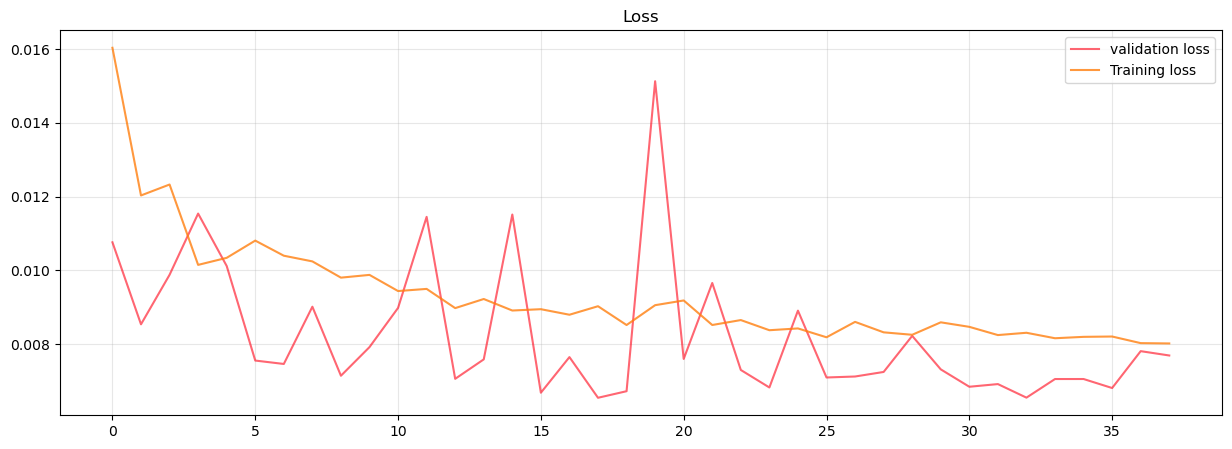

In [18]:
plt.figure(figsize=(15,5))
plt.plot(history['val_loss'], label='validation loss', alpha=.6, color='#ff0014')
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [19]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)
    # mpl.rcParams.update(mpl.rcParamsDefault)
    # sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

In [20]:
plot_residuals(ffnn, X_train.copy(), y_train.copy())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plot_residuals(ffnn, X_test.copy(), y_test.copy())

In [ ]:
# Save the trained model
ffnn.save('MyFirstFFNN')

Guess, what is happening?